## 📦 Step 1: Importing Required Libraries

Let's begin by importing the essential libraries:

- **NumPy** for numerical operations  
- **Pandas** for handling tabular data  
- **Matplotlib** for plotting and visualization


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📄 Step 2: Load the Dataset

We are using the **Advertising dataset**, which contains:

- Advertising budget spent on **TV, Radio, and Newspaper**  
- Corresponding **Sales** figures

➡️ In this project, we'll only use **TV advertising** as the independent variable to predict **Sales** using **Simple Linear Regression**.


In [27]:
data=pd.read_csv("https://www.statlearning.com/s/Advertising.csv")
TV=data["TV"]
sales=data["sales"]

## 🧮 Step 3: Extract Variables

We'll extract:

- `x` → **TV** advertising spend (in $1000s)  
- `y` → **Sales** (in units)

Our goal is to learn the relationship between **TV spend** and **sales performance**.


# 📈 Calculating Slope and Intercept Manually (Least Squares Method)

To find the **best-fit line** for a dataset using linear regression, we use the **least squares method**:

---

## 🔹 Step 1: Calculate the Means  
- Mean of x:  
  $$
  \bar{x} = \frac{1}{n} \sum x_i
  $$
- Mean of y:  
  $$
  \bar{y} = \frac{1}{n} \sum y_i
  $$

---

## 🔹 Step 2: Calculate the Slope (m)  
$$
m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

---

## 🔹 Step 3: Calculate the Intercept (c)  
$$
c = \bar{y} - m \cdot \bar{x}
$$

---

## ✅ Final Best-Fit Line Equation  
$$
\boxed{y = m \cdot x + c}
$$

---

✍️ This method ensures the line minimizes the total squared vertical distance from each point to the line — hence the name **"least squares"**.


In [28]:
x=np.array(TV)
y=np.array(sales)

x_mean=np.mean(x)
y_mean=np.mean(y)

sum_xy=0
sum_x=0

for i in range(len(x)):
    sum_xy+=(x[i]-x_mean)*(y[i]-y_mean)
    sum_x+=(x[i]-x_mean)**2

m=sum_xy/sum_x
c=y_mean-(m*x_mean)

print("slope-> ",m,"\n")
print("Intercept-> ",c)

slope->  0.04753664043301969 

Intercept->  7.032593549127704


### 🔮Step 4: Predicting Values

To predict values using the best-fit line, we use:

$$
y_{pred} = m \cdot x + c
$$

Where:  
- \( y_pred \) is the predicted value  
- \( m \) is the slope  
- \( c \) is the intercept  
- \( x \) is the input/feature value


In [29]:
y_pred=m*x+c

## 📉step 5: Visualizing the Best Fit Line

This plot helps us understand how well our line fits the data:

- **Red stars**: Actual sales data  
- **Blue line**: Predicted line using regression

A good fit will show the blue line passing through the trend of red points.



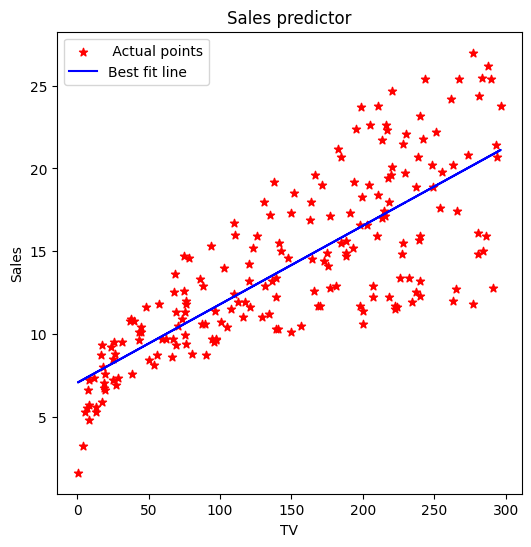

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,marker="*",color="red",label=" Actual points")
plt.plot(x,y_pred,color="blue",label="Best fit line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales predictor")
plt.legend()
plt.show()

## 🔮step 6: Making Predictions

We now define a `predict()` function that takes TV advertising spend (in **$1000s**) and predicts the expected **Sales** using the learned linear model:

_Formula:_  
\[
 Sales = m*TV+ c
\]

#### Example:
If m = 2, c = 3, and x = 4,  
$$
y_{pred} = 2 \cdot 4 + 3 = 11
$$



In [31]:
def predict(x):
    return m * x + c

spend = float(input("Enter TV advertising spend (in $1000s): "))
prediction = predict(spend)

print(f"Predicted Sales: {prediction:.2f} (in $1000s)")

Enter TV advertising spend (in $1000s): 170
Predicted Sales: 15.11 (in $1000s)


## 📏Step 7: Calculating R² (Coefficient of Determination)

The **R² score** tells us how well our regression line fits the data. It ranges from 0 to 1, where:

- **1** means a perfect fit (all points lie exactly on the line)
- **0** means the line does no better than the mean of y

---

### 🧮 Formula:
$$
R^2 = 1 - \frac{\sum (y_{pred} - y)^2}{\sum (\bar{y} - y)^2}
$$


A higher R² means your model is doing a better job predicting the values.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [32]:
r2=1-sum((y_pred-y)**2)/sum((y_mean-y)**2)
print(r2)

0.6118750508500708


---

## 📝 Summary

In this notebook, we implemented **linear regression manually using the least squares method**. Here’s what we did:

- Calculated the **mean** of x and y.
- Computed the **slope (m)** and **intercept (c)** using the formulas.
- Derived the **best-fit line equation**:  
  $$
  y = m \cdot x + c
  $$
- Made **predictions** using this equation.
- Visualized the regression line against the data points.

This approach helps understand how regression works **under the hood**, without relying on external libraries like `scikit-learn`.

---

✅ Next Step: You can now try applying this on different datasets or extend it with error metrics like **R²**, **MSE**, etc.
